<a href="https://colab.research.google.com/github/Emilianaalia/capstone-project-hacktiv8/blob/main/capstone-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Student Mental Health Analysis

This project analyzes the mental health status of students using a publicly available dataset. It explores the relationship between stress, anxiety, depression, and lifestyle factors such as sleep, physical activity, diet, and academic performance.

### Objectives:
- Understand the distribution of mental health scores among students
- Discover possible correlations between mental health and lifestyle or academic factors
- Generate insights and recommendations using AI assistance (IBM Granite)

### Dataset:
- **Source:** [Student Mental Health Assessment Dataset](https://github.com/NidhiU-24/Student-Mental-Health-Assessment)
- **Entries:** 7000+ students
- **Features:** Age, Gender, CGPA, Stress Level, Sleep Quality, etc.

This project is part of the Hacktiv8 x IBM SkillsBuild capstone assignment.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:

url = "https://raw.githubusercontent.com/NidhiU-24/Student-Mental-Health-Assessment/main/students_mental_health_survey.csv"
data = pd.read_csv(url)
data.head()


,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [ ]:
data = data.dropna()
data['CGPA'].fillna(data['CGPA'].mean(), inplace=True)
data['Substance_Use'].fillna('Unknown', inplace=True);

In [8]:
data = data.dropna()

data['CGPA'] = data['CGPA'].fillna(data['CGPA'].mean())
data['Substance_Use'] = data['Substance_Use'].fillna('Unknown')


In [12]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 6995 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6995 non-null   int64  
 1   Course                       6995 non-null   object 
 2   Gender                       6995 non-null   object 
 3   CGPA                         6995 non-null   float64
 4   Stress_Level                 6995 non-null   int64  
 5   Depression_Score             6995 non-null   int64  
 6   Anxiety_Score                6995 non-null   int64  
 7   Sleep_Quality                6995 non-null   object 
 8   Physical_Activity            6995 non-null   object 
 9   Diet_Quality                 6995 non-null   object 
 10  Social_Support               6995 non-null   object 
 11  Relationship_Status          6995 non-null   object 
 12  Substance_Use                6995 non-null   object 
 13  Counseling_Service_Use 

,0
Age,0
Course,0
Gender,0
CGPA,0
Stress_Level,0
Depression_Score,0
Anxiety_Score,0
Sleep_Quality,0
Physical_Activity,0
Diet_Quality,0


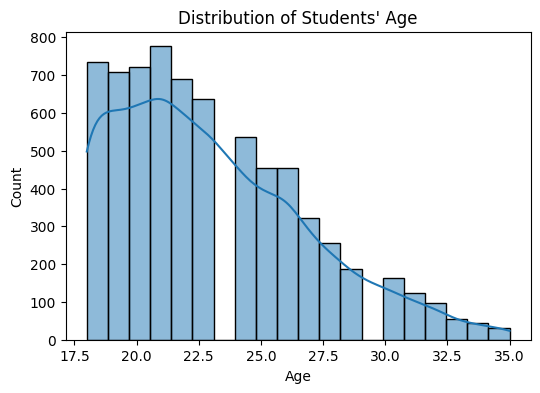

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Students\' Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


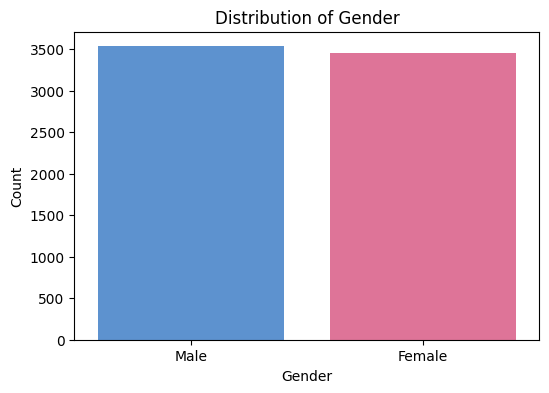

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Gender', data=data, palette={'Male': '#4A90E2', 'Female': '#F06292'},legend=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

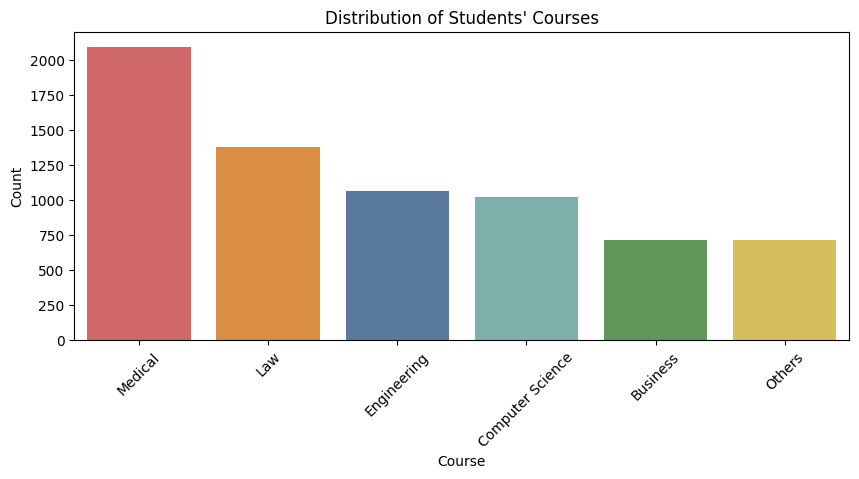

In [24]:
courses = data['Course'].value_counts().index.tolist()

custom_colors = ['#E15759', '#F28E2B','#4E79A7' , '#76B7B2', '#59A14F', '#EDC948', '#B07AA1' , '#FF9DA7']
palette = dict(zip(courses, custom_colors))

plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Course', order=courses, hue='Course', palette=palette, legend=False)
plt.title("Distribution of Students' Courses")
plt.xticks(rotation=45)
plt.xlabel('Course')
plt.ylabel('Count')
plt.show()

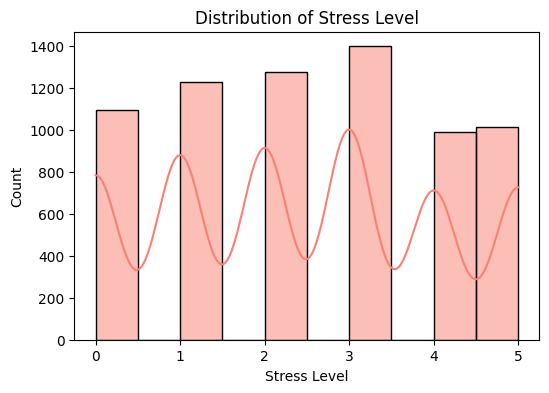

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(data['Stress_Level'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

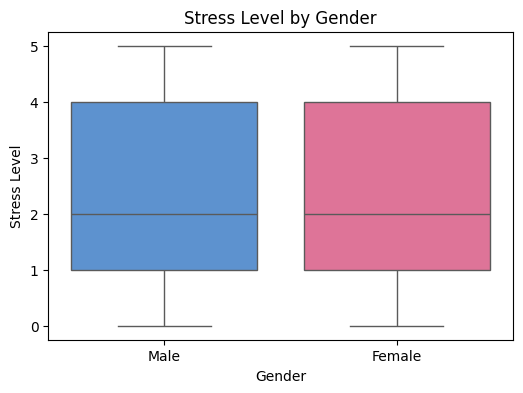

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Stress_Level', data=data, palette={'Male': '#4A90E2', 'Female': '#F06292'})
plt.title('Stress Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Level')
plt.show()


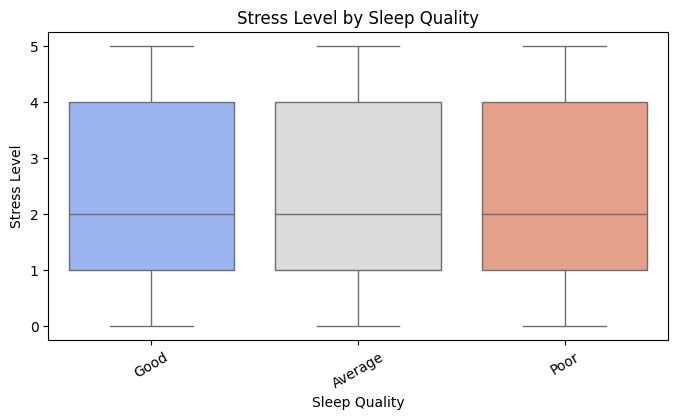

In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Sleep_Quality', y='Stress_Level', data=data, palette='coolwarm')
plt.title('Stress Level by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Stress Level')
plt.xticks(rotation=30)
plt.show()


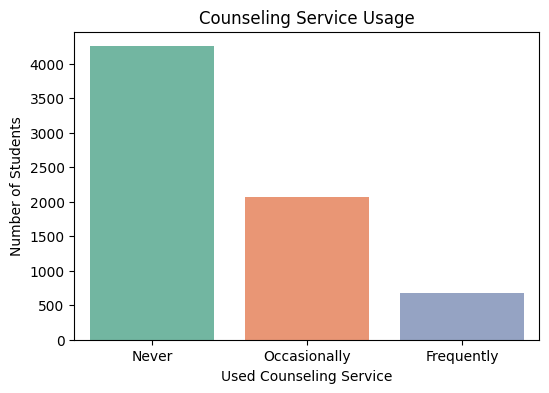

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='Counseling_Service_Use', data=data, palette='Set2')
plt.title('Counseling Service Usage')
plt.xlabel('Used Counseling Service')
plt.ylabel('Number of Students')
plt.show()


## Insight

1. **Distribution of Students' Age**  
   Most students are aged between 18–22 years old.

2. **Distribution of Gender**  
   The number of male and female students is nearly balanced.

3. **Distribution of Students' Course**  
   Most students are enrolled in medical-related programs.

4. **Distribution of Stress Level**  
   The majority of students report a stress level of 3 on a scale of 0 to 5.

5. **Stress Level by Gender**  
   Stress levels among male and female students are relatively similar, mostly ranging between levels 1 to 4.

6. **Stress Level by Sleep Quality**  
   Students with "Good", "Average", or "Poor" sleep quality tend to experience similar levels of stress.

7. **Counseling Services Usage**  
   Most students have never used counseling services, compared to fewer who used them occasionally or frequently.


In [ ]:
!pip install langchain_community
!pip install replicate

In [7]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [13]:
# Prompt untuk conclusion yang factual & singkat
prompt = """
Based on the following insights from a student mental health dataset, write a short, factual, and neutral conclusion paragraph.
Avoid speculation or assumptions. Only summarize the patterns observed in the data.

- Most students are aged between 18–22.
- Stress levels are moderate and similar between male and female students.
- Most students are enrolled in medical-related courses.
- Sleep quality shows little variation in stress levels.
- Most students never use counseling services.

The conclusion should be no more than 5 sentences and markdown-friendly.
"""

# Generate output
response = output.invoke(
    prompt,
    temperature=0.5,
    top_p=0.9,
    top_k=40,
    max_tokens=150,
    repetition_penalty=1.1
)

print(response)

```
The dataset reveals that the majority of students fall within the 18-22 age range and are predominantly enrolled in medical-related courses. Stress levels are consistently moderate, with no significant disparity between male and female students. Despite moderate stress, sleep quality remains relatively stable. Notably, utilization of counseling services is low, as most students do not seek such support.
```

Citation style: APA

Reference: Student Mental Health Dataset. (Year).


In [9]:
prompt = """
Based on these insights from a student mental health survey, provide 3 short and practical recommendations for universities to improve student well-being:

- Most students are aged 18–22.
- Stress levels are mostly moderate.
- Sleep quality does not vary much with stress.
- Most students do not use counseling services.
- Medical students dominate the data.
- Males and females show similar stress levels.

Keep it short, direct, and suitable for presentation slides.
"""

response = output.invoke(
    prompt,
    stop=None,
    max_tokens=300,
    top_p=0.8,
    temperature=0.6
)

print(response)


**Slide 1: Recommendation 1 - Enhance Accessibility to Counseling Services**

*Headline:* Increase Utilization of Counseling Services

*Bullet Points:*
- Despite moderate stress levels, most students avoid counseling.
- Implement outreach programs to destigmatize mental health support.
- Offer flexible counseling options (online, drop-in hours) to accommodate diverse student needs.

---

**Slide 2: Recommendation 2 - Prioritize Sleep Education**

*Headline:* Promote Healthy Sleep Habits

*Bullet Points:*
- Sleep quality remains relatively stable regardless of stress levels.
- Integrate sleep hygiene workshops or online resources into student orientation and wellness programs.
- Encourage academic departments to incorporate sleep-related topics in relevant courses (e.g., psychology, biology).

---

**Slide 3: Recommendation 3 - Tailored Support for Medical Students**

*Headline:* Targeted Well-being Initiatives for Medical Students

*Bullet Points:*
- Medical students represent a signif

### References

- NidhiU. (2023). *Student Mental Health Assessment Dataset* [Data set]. GitHub. https://github.com/NidhiU-24/Student-Mental-Health-Assessment  
- IBM Granite. (2024). *Granite 3.3-8B Instruct Model* [Large Language Model]. Replicate. https://replicate.com/ibm-granite/granite-3.3-8b-instruct
